In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report




In [2]:
 #   Load the dataset
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Check the duplicate rows.
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [6]:
# Check the data information using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above data info we can see that Age and Cabin have an unequal number of counts. And some of the columns are categorical and have data type objects and some are integer and float values.


In [7]:
# the descriptive structure of the data using df.describe()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check the categorical and numerical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
num_col =[col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [9]:
# Check the total number of unique values in the Categorical columns
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [10]:
# Check the total number of unique values in the numerical columns
df[num_col].nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

In [11]:
round((df.isnull().sum()/df.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


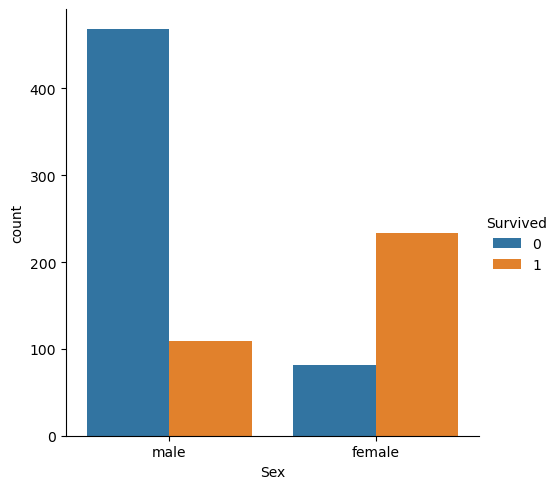

In [12]:
sns.catplot(x ="Sex", hue ="Survived", 
kind ="count", data = df)

by observing the graph,the survival rate of men is around 20% and that of women is around 75%.Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

<Axes: xlabel='Survived', ylabel='Pclass'>

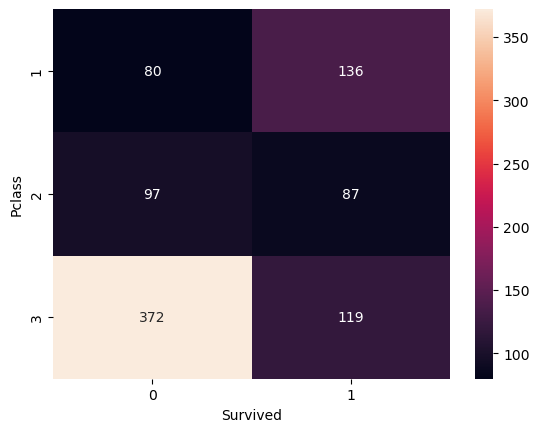

In [13]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


 Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

<Axes: xlabel='Sex', ylabel='Age'>

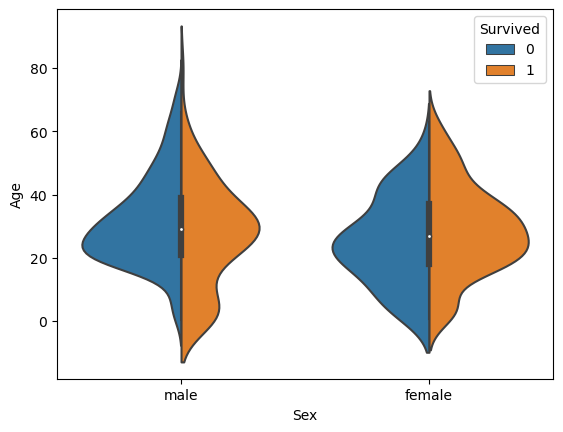

In [14]:
# Age Vs Survived
# Violinplot Displays distribution of data 
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = df, split = True)


 The survival rate is  Good for children. High for women in the age range 20-50. Less for men as the age increases.


<Axes: xlabel='Fare_Range', ylabel='Survived'>

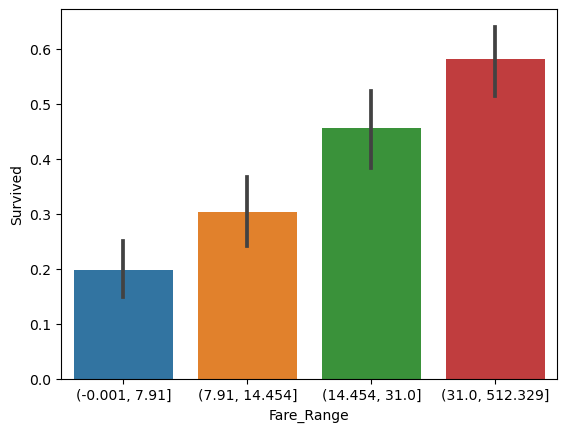

In [15]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

# Barplot - Shows approximate values based 
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', 
data = df)


Fare denotes the fare paid by a passenger.It can be concluded that if a passenger paid a higher fare, the survival rate is more.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


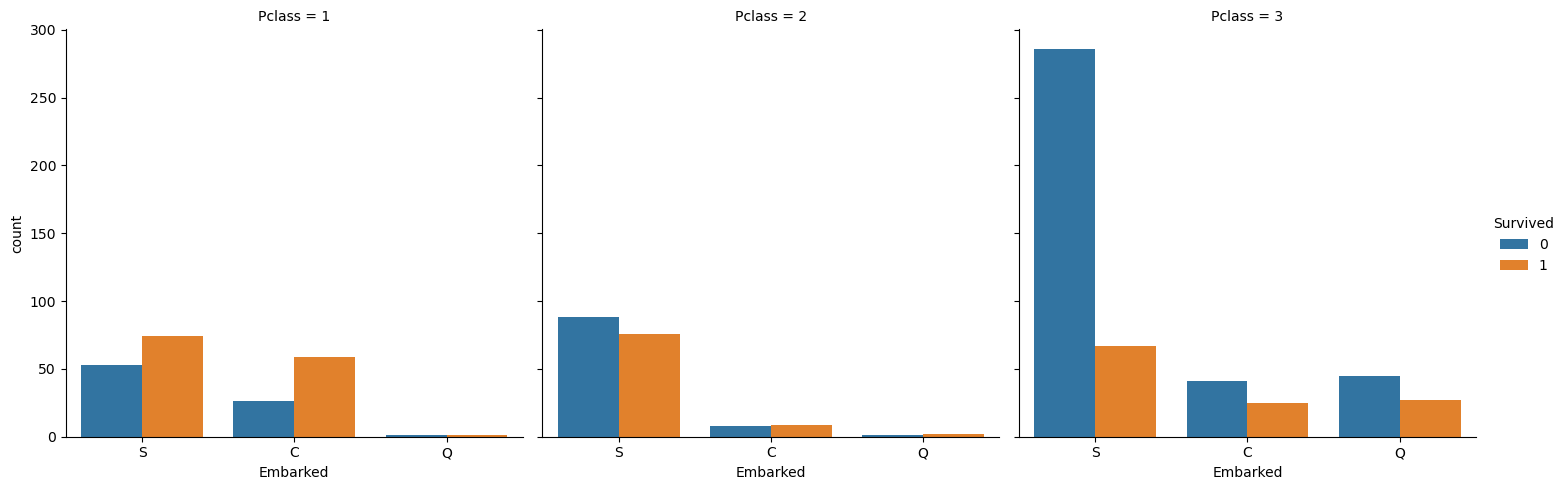

In [16]:
# Categorical Count Plots for Embarked Feature  
# Countplot
sns.catplot(x ='Embarked', hue ='Survived', 
kind ='count', col ='Pclass', data = df)


Majority of the passengers boarded from S. So, the missing values can be filled with S.S looks lucky for class 1 and 2 passengers compared to class 3.

The columns that can be dropped are: 
PassengerId, Name, Ticket: They are strings, cannot be categorized and don’t contribute much to the outcome. 
Age, Fare: Instead, the respective range columns are retained.


1.The Columns having null value are : Age,Cabin,Embarked They need to be filled up with appropriate value.
2.From Embarked  observation Majority of the Passenger boarded from S, so missin value can be fill with S.

In [17]:
# age,Embarked,Cabin columns filling missing value

df.Embarked.fillna('S', inplace=True)
df.Cabin.fillna('Missing', inplace=True)
df.Age.fillna(df.Age.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    object  
 12  Fare_Range   891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.8+ KB


In [18]:
# Droping Unnecessary columns in a dataframe
df1 = df.drop(columns=['Name','Ticket','PassengerId'])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_Range
0,0,3,male,22.0,1,0,7.2500,Missing,S,"(-0.001, 7.91]"
1,1,1,female,38.0,1,0,71.2833,C85,C,"(31.0, 512.329]"
2,1,3,female,26.0,0,0,7.9250,Missing,S,"(7.91, 14.454]"
3,1,1,female,35.0,1,0,53.1000,C123,S,"(31.0, 512.329]"
4,0,3,male,35.0,0,0,8.0500,Missing,S,"(7.91, 14.454]"


# Feature engineering

In [19]:
from sklearn.preprocessing import OneHotEncoder
df1['Sex'] = df1['Sex'].astype('category') 
df1['Sex_new'] = df1['Sex'].cat.codes 
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform( 
    df1[[ 'Sex_new']]).toarray())
df2 = df1.join(enc_data) 
  
print(df2)

     Survived  Pclass     Sex        Age  SibSp  Parch     Fare    Cabin  \
0           0       3    male  22.000000      1      0   7.2500  Missing   
1           1       1  female  38.000000      1      0  71.2833      C85   
2           1       3  female  26.000000      0      0   7.9250  Missing   
3           1       1  female  35.000000      1      0  53.1000     C123   
4           0       3    male  35.000000      0      0   8.0500  Missing   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000  Missing   
887         1       1  female  19.000000      0      0  30.0000      B42   
888         0       3  female  29.699118      1      2  23.4500  Missing   
889         1       1    male  26.000000      0      0  30.0000     C148   
890         0       3    male  32.000000      0      0   7.7500  Missing   

    Embarked       Fare_Range  Sex_new    0    1  
0          S   (-0.001, 7.91]       

In [20]:
df3= df2.drop(columns=['Sex',1,0])
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Fare_Range,Sex_new
0,0,3,22.0,1,0,7.2500,Missing,S,"(-0.001, 7.91]",1
1,1,1,38.0,1,0,71.2833,C85,C,"(31.0, 512.329]",0
2,1,3,26.0,0,0,7.9250,Missing,S,"(7.91, 14.454]",0
3,1,1,35.0,1,0,53.1000,C123,S,"(31.0, 512.329]",0
4,0,3,35.0,0,0,8.0500,Missing,S,"(7.91, 14.454]",1


In [21]:
# Cabin has indeed a lot of labels, here for simplicity, I will capture the first letter of the cabin, 
# but the procedure could be done as well without any prior variable manipulation

len(df3.Cabin.unique()) # check number of different labels in Cabin


148

In [22]:
# Now we extract the first letter of the cabin

df3['Cabin'] = df3['Cabin'].astype(str).str[0]



In [23]:
# check the labels again, we have much less categories in Cabin now

print(df3.Cabin.unique())

print(df3.Embarked.unique())

['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
['S' 'C' 'Q']


In [24]:
# now we order the labels according to the mean target value

print(df3.groupby(['Cabin'])['Survived'].mean().sort_values())
print(df3.groupby(['Embarked'])['Survived'].mean().sort_values())

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64
Embarked
S    0.339009
Q    0.389610
C    0.553571
Name: Survived, dtype: float64


In [25]:
# now we generate an ordered list with the labels

print(df3.groupby(['Cabin'])['Survived'].mean().sort_values().index)
print(df3.groupby(['Embarked'])['Survived'].mean().sort_values().index)

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')
Index(['S', 'Q', 'C'], dtype='object', name='Embarked')


In [26]:
# now we generate an ordered list with the labels (same as above but we capture the list in a variable)

ordered_labels = df3.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordered_labelsE = df3.groupby(['Embarked'])['Survived'].mean().sort_values().index


In [27]:
# and now we create a dictionary that maps each label to the number

ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
print(ordinal_label)
ordinal_labelE = {k:i for i, k in enumerate(ordered_labelsE, 0)}
print(ordinal_labelE)

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}
{'S': 0, 'Q': 1, 'C': 2}


For Cabin this method assigned the number 0 to T, the category with the lowest target mean, and 9 to E, the category with the highest target mean.

For Embarked  this method assigned the number 0 to S, the category with the lowest target mean, and 2 to C, the category with the highest target mean

In [28]:
# replace the labels with the ordered numbers of cabin & Embarked

df3['Cabin_ordered'] = df3.Cabin.map(ordinal_label)

df3['Embarked_ordered'] = df3.Embarked.map(ordinal_labelE)

print(df3.head())


   Survived  Pclass   Age  SibSp  Parch     Fare Cabin Embarked  \
0         0       3  22.0      1      0   7.2500     M        S   
1         1       1  38.0      1      0  71.2833     C        C   
2         1       3  26.0      0      0   7.9250     M        S   
3         1       1  35.0      1      0  53.1000     C        S   
4         0       3  35.0      0      0   8.0500     M        S   

        Fare_Range  Sex_new  Cabin_ordered  Embarked_ordered  
0   (-0.001, 7.91]        1              1                 0  
1  (31.0, 512.329]        0              4                 2  
2   (7.91, 14.454]        0              1                 0  
3  (31.0, 512.329]        0              4                 0  
4   (7.91, 14.454]        1              1                 0  


Text(0, 0.5, 'Survived')

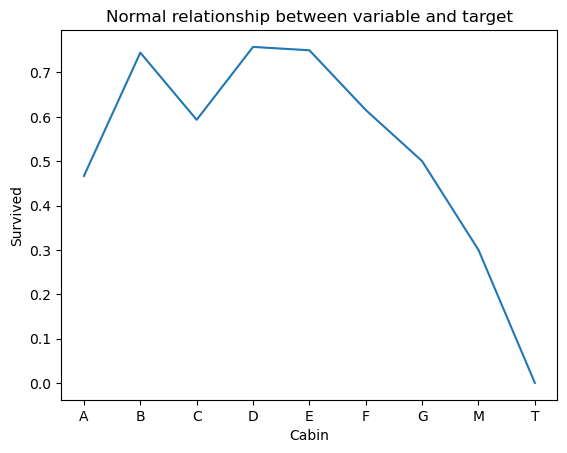

In [29]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

fig = plt.figure()
fig = df3.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

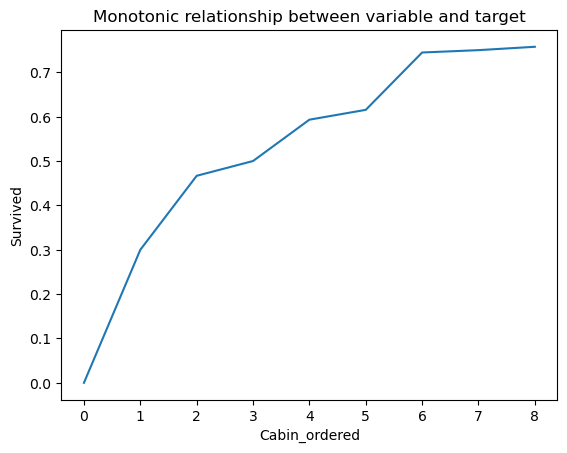

In [30]:
# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = df3.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

There is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.

Text(0, 0.5, 'Survived')

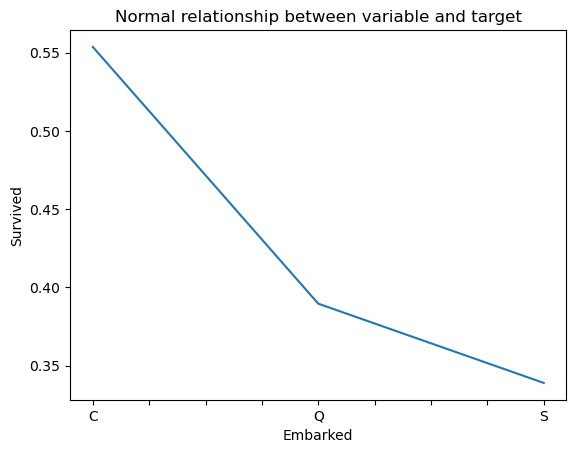

In [31]:
# now check for Embarked
fig = plt.figure()
fig = df3.groupby(['Embarked'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

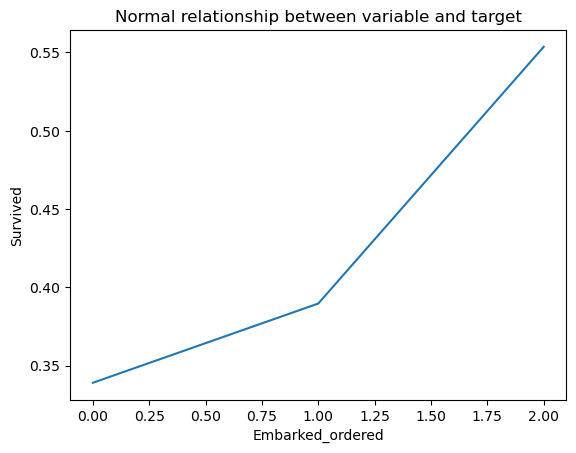

In [32]:
fig = plt.figure()
fig = df3.groupby(['Embarked_ordered'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

In [33]:
X = df3.drop(columns =['Survived','Cabin','Embarked','Fare_Range'])
y = df['Survived']

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Age               891 non-null    float64
 2   SibSp             891 non-null    int64  
 3   Parch             891 non-null    int64  
 4   Fare              891 non-null    float64
 5   Sex_new           891 non-null    int8   
 6   Cabin_ordered     891 non-null    int64  
 7   Embarked_ordered  891 non-null    int64  
dtypes: float64(2), int64(5), int8(1)
memory usage: 49.7 KB


In [35]:
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# numerical columns
num_col = [col for col in X.columns if X[col].dtype !='object']
X1 = X
# learning the statistical parameters for each of the data and transforming
X1[num_col] =scaler.fit_transform(X1[num_col])
X1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_new,Cabin_ordered,Embarked_ordered
0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.125,0.0
1,0.0,0.472229,0.125,0.0,0.139136,0.0,0.500,1.0
2,1.0,0.321438,0.000,0.0,0.015469,0.0,0.125,0.0
3,0.0,0.434531,0.125,0.0,0.103644,0.0,0.500,0.0
4,1.0,0.434531,0.000,0.0,0.015713,1.0,0.125,0.0


In [36]:
x_train,x_test,y_train,y_test = train_test_split(X1,y, test_size= 0.30, random_state = 355)

# Logestic Regrassion

In [37]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [38]:
log_reg.score(x_train,y_train)

0.8057784911717496

In [39]:
y_pred = log_reg.predict(x_test)
print("accuracy of the classifier: ",log_reg.score(x_test,y_test))


# performance evaluatio metrics 
print(classification_report(y_pred, y_test))

accuracy of the classifier:  0.7985074626865671
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       167
           1       0.74      0.71      0.73       101

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [40]:

# Area Under Curve
log_auc = roc_auc_score(y_test,y_pred)
print(f'log_auc :',log_auc)

log_auc : 0.7863386989811298


In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

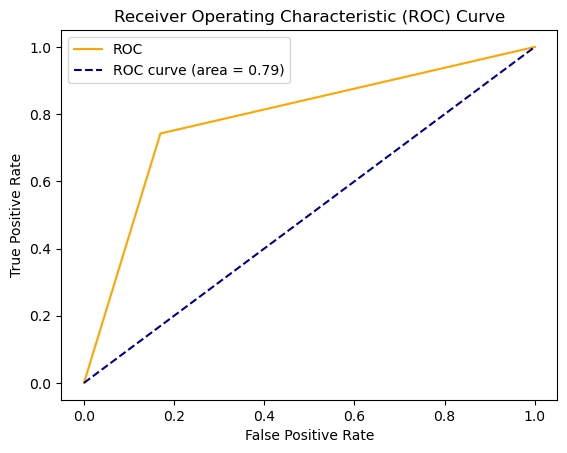

In [42]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % log_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show

# AdaBoost Classifier

In [43]:
ada = AdaBoostClassifier(random_state=5)
ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=5)

In [44]:
ada.score(x_train,y_train)

0.8282504012841091

In [45]:
ada_pred = ada.predict(x_test)

print("accuracy of the classifier: ",ada.score(x_test,y_test))

# performance evaluatio metrics 
print(classification_report(ada_pred, y_test))

accuracy of the classifier:  0.7723880597014925
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       158
           1       0.75      0.66      0.71       110

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [46]:

# Area Under Curve
ada_auc = roc_auc_score(y_test,ada_pred)
print(f'ada_auc :',ada_auc)

ada_auc : 0.7681015252908905


In [47]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, ada_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

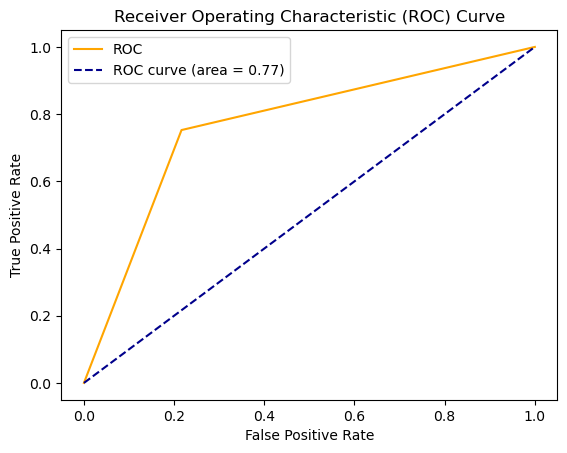

In [48]:
# plot ROC
plt.plot(fpr1, tpr1, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % ada_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show

# Random Forest classifier

In [49]:
rf = RandomForestClassifier(random_state=40, max_depth = 4)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=40)

In [50]:
rf.score(x_train,y_train)

0.8459069020866774

In [51]:
rf_pred = rf.predict(x_test)

print("accuracy of the classifier: ",rf.score(x_test,y_test))

# performance evaluatio metrics 
print(classification_report(rf_pred, y_test))

accuracy of the classifier:  0.8246268656716418
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       184
           1       0.69      0.80      0.74        84

    accuracy                           0.82       268
   macro avg       0.80      0.82      0.80       268
weighted avg       0.83      0.82      0.83       268



In [52]:

# Area Under Curve
rf_auc = roc_auc_score(y_test,rf_pred)
print(f'rf_auc :',rf_auc)

rf_auc : 0.7956532224030868


In [53]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, rf_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

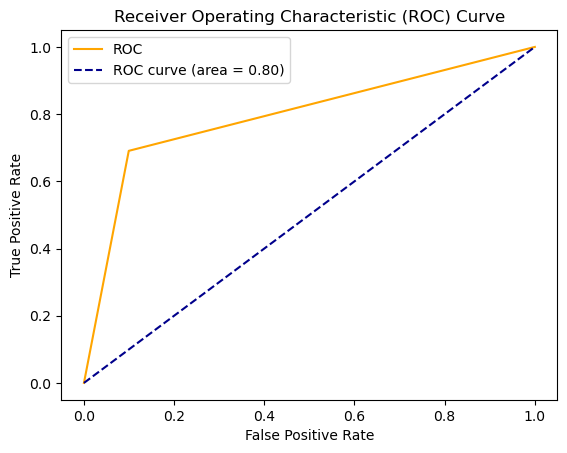

In [54]:
# plot ROC
plt.plot(fpr2, tpr2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % rf_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show

In [55]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['auto','log2', None], 
    'max_depth': range(2,20,1),
    'max_leaf_nodes': range(1,10,1), 
}

In [56]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(x_train, y_train)

print(grid_search.best_estimator_)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3960 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-pac

RandomForestClassifier(max_depth=8, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [60]:
rand_clf=RandomForestClassifier(max_depth=8, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)

rand_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)

In [61]:
rand_clf.score(x_train,y_train)

0.8475120385232745

In [62]:
ran_pred = rand_clf.predict(x_test)

print("accuracy of the classifier: ",rand_clf.score(x_test,y_test))

# performance evaluatio metrics 
print(classification_report(ran_pred, y_test))

accuracy of the classifier:  0.8022388059701493
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       180
           1       0.68      0.75      0.71        88

    accuracy                           0.80       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.81      0.80      0.80       268



rf_auc : 0.7758787001868933


<function matplotlib.pyplot.show(close=None, block=None)>

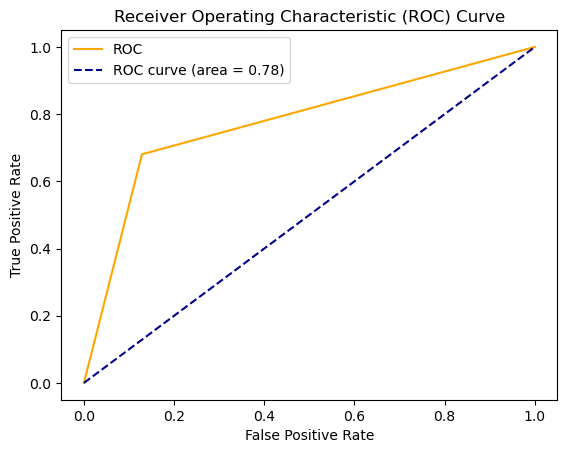

In [63]:
# Area Under Curve
ran_auc = roc_auc_score(y_test,ran_pred)
print(f'rf_auc :',ran_auc)

fpr2, tpr2, thresholds2 = roc_curve(y_test,ran_pred)

# plot ROC
plt.plot(fpr2, tpr2, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % ran_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show

